# Working With Time Series Data

In [1]:
import pandas as pd
import numpy as np
import mason_functions as mf
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

#### pip install vega_datasets

You can use this library like so:

#### from vega_datasets import data

#### data.sf_temps()


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#import vega datasets
from vega_datasets import data

#set dataframe equal to data from sf_temps
df = data.sf_temps()

#check df
df

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
#set dataframe equal to df with date as the sorted index
df = df.set_index('date').sort_index()

In [5]:
#check it
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [6]:
#check df again
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [7]:
#assign new dataframe to data resampled by day and aggregate by mean
temp_by_day = df.resample('D').mean()

temp_by_day

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


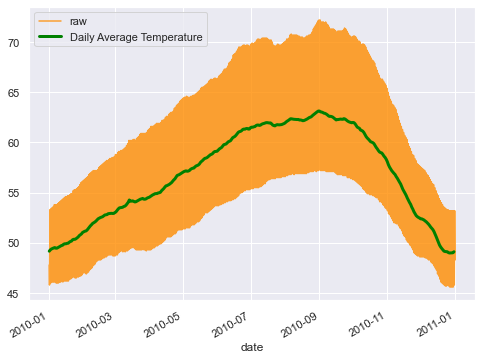

In [8]:
#visualize temperature over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'green', label = 'Daily Average Temperature', lw = 3)
plt.legend();

2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
#assign dataframe to frame resamples by day using minimum temperature
min_by_day = df.resample('D').min()
min_by_day

,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10
...,...
2010-12-27,45.60
2010-12-28,45.60
2010-12-29,45.60


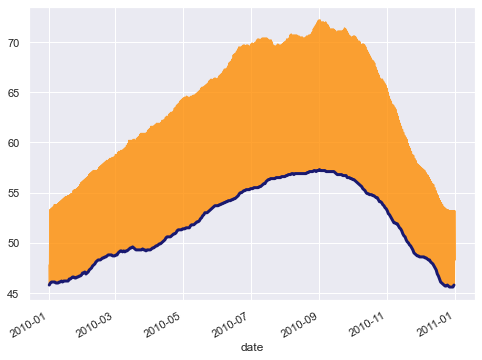

In [10]:
#visualize temperature over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize minimum temperature per day over time
min_by_day.temp.plot(c = 'midnightblue', label = 'Daily Minimum Temperature', lw = 3);

3. Write the code necessary to visualize maximum temperature over time.

In [11]:
#assign dataframe to original resampled by day (max temp)
max_by_day = df.resample('D').max()
max_by_day

,temp
date,
2010-01-01,53.30
2010-01-02,53.40
2010-01-03,53.50
2010-01-04,53.60
2010-01-05,53.80
...,...
2010-12-27,53.20
2010-12-28,53.20
2010-12-29,53.20


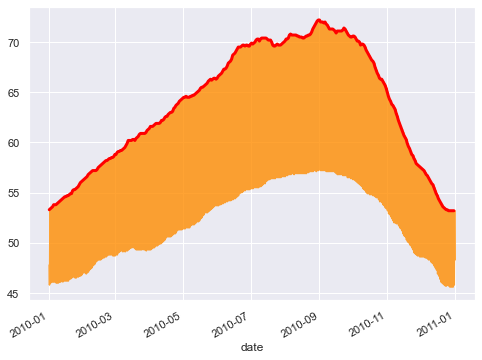

In [12]:
#visualize raw temperature data over time
df.temp.plot(c = 'darkorange', label = 'raw', alpha = .8)

#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'red', label = 'Daily Maximum Temperature', lw = 3);

4. Which month is the coldest, on average?

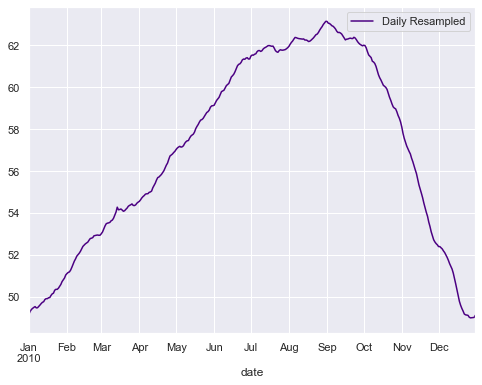

In [13]:
#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'indigo', label = 'Daily Resampled')
plt.legend();

In [14]:
#pull up records where the minimum daily average temperature is present
temp_by_day[temp_by_day.temp == temp_by_day.temp.min()]

,temp
date,
2010-12-27,48.99


December has the coldest daily average temperature.

In [15]:
#resample by month using the minimum monthly temp
min_by_month = df.resample('M').min()
min_by_month

,temp
date,
2010-01-31,45.80
2010-02-28,46.90
2010-03-31,48.70
2010-04-30,49.30
2010-05-31,51.40
2010-06-30,53.70
2010-07-31,55.40
2010-08-31,56.60
2010-09-30,56.40


In [16]:
#pull up record where the minimum monthly temperature is the minimum measurement for this column
min_by_month[min_by_month.temp == min_by_month.temp.min()]

,temp
date,
2010-12-31,45.60


December is also coldest on average; it has the lowest monthly average temperature.

5. Which month has the highest average temperature?

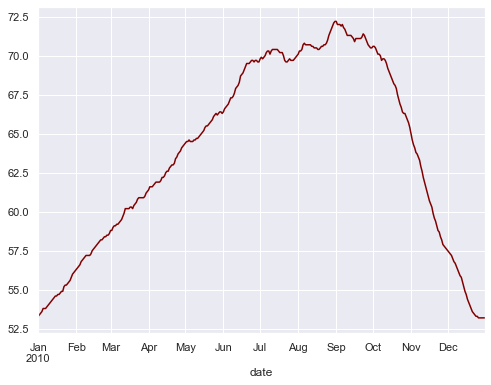

In [17]:
#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'maroon', label = 'Daily Resampled (Maximum Temperature)');

In [18]:
#pull up records where the maximum daily average temperature is present
temp_by_day[temp_by_day.temp == temp_by_day.temp.max()]

,temp
date,
2010-08-31,63.13
2010-09-01,63.13


August and September have the highest daily average temperature.

In [19]:
#resample by month using maximum monthly temperature
max_by_month = df.resample('M').max()

#check it
max_by_month

,temp
date,
2010-01-31,56.20
2010-02-28,58.60
2010-03-31,61.30
2010-04-30,64.30
2010-05-31,66.40
2010-06-30,69.70
2010-07-31,70.40
2010-08-31,72.20
2010-09-30,72.20


In [20]:
#pull up records where the monthly maximum temperature is present
max_by_month[max_by_month.temp == max_by_month.temp.max()]

,temp
date,
2010-08-31,72.20
2010-09-30,72.20


August and September also have the highest monthly average temperature.

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

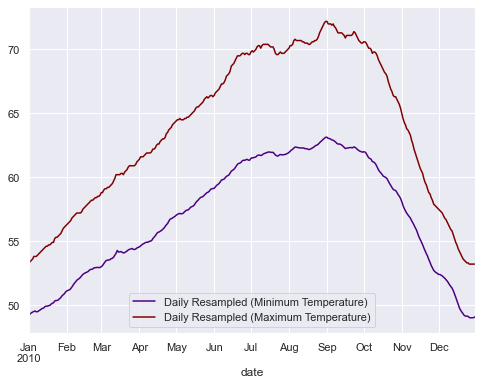

In [21]:
#visualize average temperature per day over time
temp_by_day.temp.plot(c = 'indigo', label = 'Daily Resampled (Minimum Temperature)')

#visualize maximum temperature per day over time
max_by_day.temp.plot(c = 'maroon', label = 'Daily Resampled (Maximum Temperature)')

#labels
plt.legend();

In [22]:
#resample dataframe
daily_extremes = df.resample('D').agg(['max', 'min'])

In [23]:
#check table info
daily_extremes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (temp, max)  365 non-null    float64
 1   (temp, min)  365 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [24]:
#assign new column to the difference between the max and min temp
daily_extremes.columns = ['maximum', 'minimum']
daily_extremes['variance'] = daily_extremes.maximum - daily_extremes.minimum

In [25]:
#check it
daily_extremes

,maximum,minimum,variance
date,,,
2010-01-01,53.30,45.80,7.50
2010-01-02,53.40,46.00,7.40
2010-01-03,53.50,46.10,7.40
2010-01-04,53.60,46.10,7.50
2010-01-05,53.80,46.10,7.70
...,...,...,...
2010-12-27,53.20,45.60,7.60
2010-12-28,53.20,45.60,7.60
2010-12-29,53.20,45.60,7.60


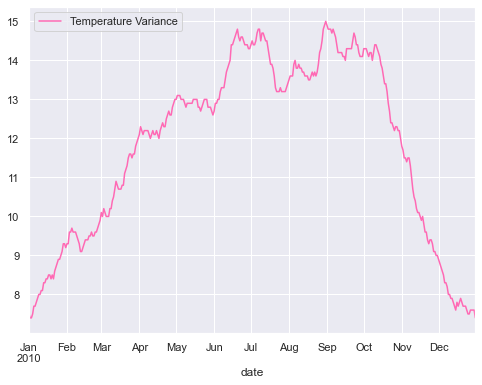

In [26]:
#plot the variance of temperature by day over time
daily_extremes.variance.plot(c = 'hotpink', label = 'Temperature Variance')
plt.legend();

In [27]:
#pull up the row where the variance is highest
daily_extremes[daily_extremes.variance == daily_extremes.variance.max()]

,maximum,minimum,variance
date,,,
2010-08-31,72.20,57.20,15.00


August has the highest daily temperature variance.

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

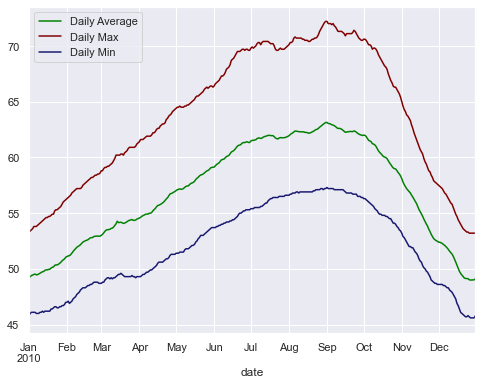

In [28]:
temp_by_day.temp.plot(c = 'green', label = 'Daily Average')    # plot average temp 
max_by_day.temp.plot(c = 'maroon', label = 'Daily Max')    # plot maximum temp
min_by_day.temp.plot(c = 'midnightblue', label = 'Daily Min')    # plot minimum temp
plt.legend();    # label plots with a legend

In [29]:
#use vega_datasets data import to get data
df = data.seattle_weather()

In [30]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [31]:
#preview data
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [32]:
#df.date[0].year, df.date[0].month

#set the index to the datetime64 column
df = df.set_index('date')
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog
2015-12-28,1.50,5.00,1.70,1.30,fog
2015-12-29,0.00,7.20,0.60,2.60,fog


In [33]:
#df.precipitation[0:31].sum()

In [34]:
#resample data by month and sum up values for the month
monthly_data = df.resample('M').sum()
monthly_data

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.30,218.70,47.80,120.90
2012-02-29,92.30,269.00,92.90,113.20
2012-03-31,183.00,296.20,88.00,131.70
2012-04-30,68.10,446.20,179.80,101.20
2012-05-31,52.20,547.50,253.90,104.00
2012-06-30,75.10,560.80,314.40,92.50
2012-07-31,26.30,710.10,400.90,89.20
2012-08-31,0.00,801.60,434.30,87.70
2012-09-30,0.90,686.40,337.30,79.40


In [35]:
#pull up records where the precipitation value is the max value
monthly_data[monthly_data.precipitation == monthly_data.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


In [36]:
#list the index
index = monthly_data.index

#print year of year-month combo with highest amount of precipitation
print(index[monthly_data.precipitation == monthly_data.precipitation.max()].year)

#print month of year-month combo with highest amount of precipitation
print(index[monthly_data.precipitation == monthly_data.precipitation.max()].month)

Int64Index([2015], dtype='int64', name='date')
Int64Index([12], dtype='int64', name='date')


##### December 2015

2. Visualize the amount of monthly precipitation over time.

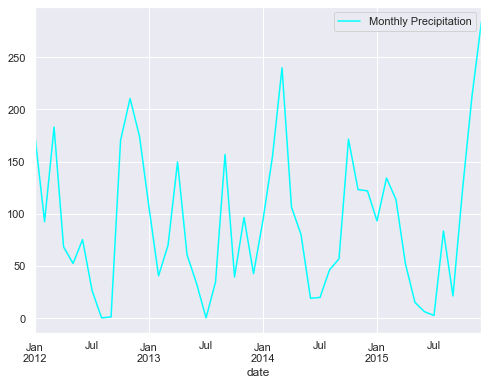

In [37]:
#plot monthly precipitation
monthly_data.precipitation.plot(c = 'cyan', label = 'Monthly Precipitation')
plt.legend();

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

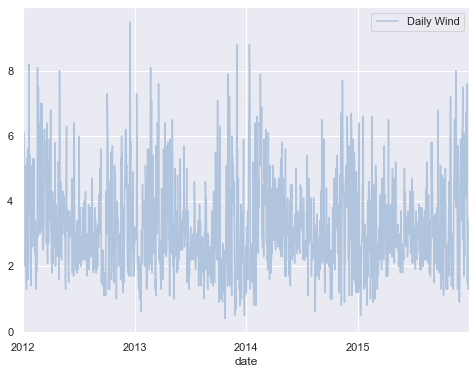

In [38]:
#plot wind over time
df.wind.plot(c = 'lightsteelblue', label = 'Daily Wind')
plt.legend();

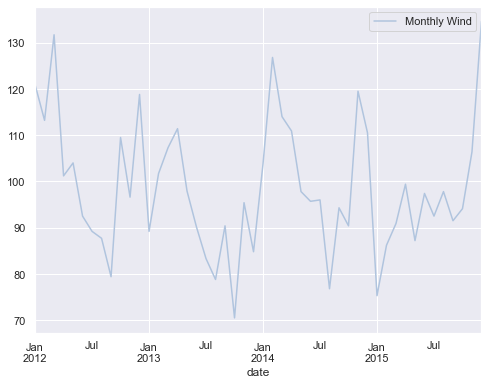

In [39]:
#plot wind over time
monthly_data.wind.plot(c = 'lightsteelblue', label = 'Monthly Wind')
plt.legend();

In [40]:
#resample data by sum of values in a year
yearly_data = df.resample('Y').sum()
yearly_data

,precipitation,temp_max,temp_min,wind
date,,,,
2012-12-31,1226.00,5591.30,2668.00,1244.70
2013-12-31,828.00,5861.50,2976.20,1100.80
2014-12-31,1232.80,6203.50,3161.80,1236.50
2015-12-31,1139.20,6361.20,3225.00,1153.30


In [41]:
#resample data by monthly averages 
monthly_averages = df.resample('M').mean()
monthly_averages.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,5.59,7.05,1.54,3.90
2012-02-29,3.18,9.28,3.20,3.90
2012-03-31,5.90,9.55,2.84,4.25
2012-04-30,2.27,14.87,5.99,3.37
2012-05-31,1.68,17.66,8.19,3.35


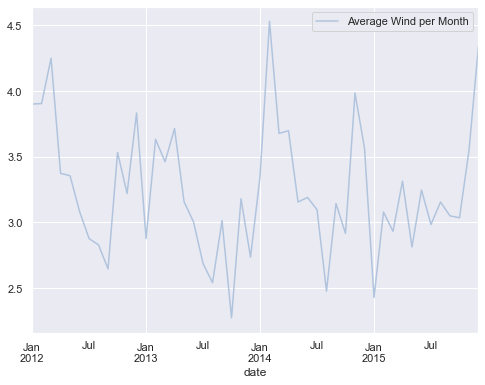

In [42]:
#plot average wind per month
monthly_averages.wind.plot(c = 'lightsteelblue', label = 'Average Wind per Month')
plt.legend();

This looks completely different. Just kidding, it's about the very same shape scaled down from the sum.

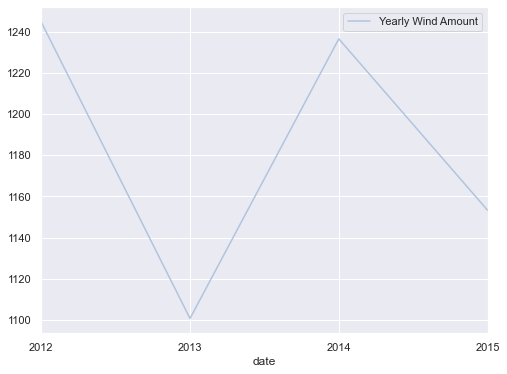

In [43]:
#plot yearly wind sums over time
yearly_data.wind.plot(c = 'lightsteelblue', label = 'Yearly Wind Amount')
plt.legend();

There doesn't seem like much here.

4. Which year-month combination is the windiest?

In [44]:
#pull up records for where ever the sums of wind data came to a maximum 
monthly_data[monthly_data.wind == monthly_data.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


In [45]:
print(index[monthly_data.wind == monthly_data.wind.max()].year)
print(index[monthly_data.wind == monthly_data.wind.max()].month)

Int64Index([2015], dtype='int64', name='date')
Int64Index([12], dtype='int64', name='date')


##### December 2015

5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [46]:
#make sunny column
df['sunny'] = df.weather == 'sun'

In [47]:
#map true and false to 1 and 0
df.sunny = df.sunny.map({True: 1,
                         False: 0
                        })

In [48]:
#resample data by year using the sums of the features
yearly = df.resample('Y').sum()

#check it
yearly 

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2012-12-31,1226.00,5591.30,2668.00,1244.70,118
2013-12-31,828.00,5861.50,2976.20,1100.80,205
2014-12-31,1232.80,6203.50,3161.80,1236.50,211
2015-12-31,1139.20,6361.20,3225.00,1153.30,180


In [49]:
#pull up records where the yearly amount of sunny days is the maximum
yearly[yearly.sunny == yearly.sunny.max()]

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2014-12-31,1232.80,6203.50,3161.80,1236.50,211


6. In which month does it rain the most?

7. Which month has the most number of days with a non-zero amount of precipitation?

In [50]:
#create boolean mask column that determines whether or not there is a zero amount of precipitation
df['drops'] = df.precipitation > 0

#map 1 for True and 0 for False
df.drops = df.drops.map({True: 1,
                         False: 0
                        })

In [51]:
#assign dataframe to resampling of data by month using sums of the features in that month
monthly = df.resample('M').sum()

#check it
monthly

,precipitation,temp_max,temp_min,wind,sunny,drops
date,,,,,,
2012-01-31,173.30,218.70,47.80,120.90,4,22
2012-02-29,92.30,269.00,92.90,113.20,8,19
2012-03-31,183.00,296.20,88.00,131.70,6,22
2012-04-30,68.10,446.20,179.80,101.20,8,17
2012-05-31,52.20,547.50,253.90,104.00,14,10
2012-06-30,75.10,560.80,314.40,92.50,10,14
2012-07-31,26.30,710.10,400.90,89.20,12,7
2012-08-31,0.00,801.60,434.30,87.70,24,0
2012-09-30,0.90,686.40,337.30,79.40,18,3


In [52]:
#pull up records where the amount of days where there is a non-zero amount of precipitation
monthly[monthly.drops == monthly.drops.max()]

,precipitation,temp_max,temp_min,wind,sunny,drops
date,,,,,,
2012-12-31,174.00,224.30,102.10,118.80,1,27


In [53]:
#assign variable to index of monthly df
monthly_index = monthly.index

monthly_index[monthly.drops == monthly.drops.max()].month

Int64Index([12], dtype='int64', name='date')

December is the month with the most amount of days with non-zero amount of precipitation.